In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

%matplotlib inline

In [2]:
phi_p, k, tau, c_s, ktau = symbols('phi_p k tau c_s ktau')

In [3]:
phi = 9*phi_p / (k*tau)**2 * (sin(k*c_s*tau) / (k*c_s*tau) - cos(k*c_s*tau))

In [4]:
phi

9*phi_p*(-cos(c_s*k*tau) + sin(c_s*k*tau)/(c_s*k*tau))/(k**2*tau**2)

In [5]:
phi_scaled = phi.subs(k*tau, ktau).subs(c_s, 1./sqrt(3)).subs(phi_p, 1)
phi_scaled

9*(-cos(0.333333333333333*sqrt(3)*ktau) + 1.0*sqrt(3)*sin(0.333333333333333*sqrt(3)*ktau)/ktau)/ktau**2

In [6]:
R = -k**2 * phi + 3/(tau) * diff(phi, tau) + 3 * diff(diff(phi, tau), tau)
R = R.simplify()

In [7]:
R

9*phi_p*(3*c_s**3*k**3*tau**3*cos(c_s*k*tau) - 12*c_s**2*k**2*tau**2*sin(c_s*k*tau) - 27*c_s*k*tau*cos(c_s*k*tau) + k**2*tau**2*(c_s*k*tau*cos(c_s*k*tau) - sin(c_s*k*tau)) + 27*sin(c_s*k*tau))/(c_s*k**3*tau**5)

In [8]:
R_scaled = (R / k**2).subs(k*tau, ktau).subs(c_s, 1./sqrt(3)).subs(phi_p, 1)
R_scaled

9.0*sqrt(3)*(0.333333333333333*sqrt(3)*ktau**3*cos(0.333333333333333*sqrt(3)*ktau) + ktau**2*(0.333333333333333*sqrt(3)*ktau*cos(0.333333333333333*sqrt(3)*ktau) - sin(0.333333333333333*sqrt(3)*ktau)) - 4.0*ktau**2*sin(0.333333333333333*sqrt(3)*ktau) - 9.0*sqrt(3)*ktau*cos(0.333333333333333*sqrt(3)*ktau) + 27*sin(0.333333333333333*sqrt(3)*ktau))/ktau**5

In [9]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset, inset_axes

<string>:2: RuntimeWarning: invalid value encountered in true_divide


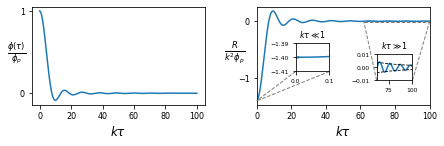

In [10]:
R_lambda = lambdify(ktau, R_scaled)

fig, axs = plt.subplots(1, 2, figsize=(6.5, 6.5*0.3))

ax = axs[0]

t = np.linspace(0, 100, 100000)
phi_lambda = lambdify(ktau, phi_scaled)
ax.plot(t, phi_lambda(t))
ax.set_xlabel(r"$k\tau$", fontsize=12)
ax.set_ylabel(r"$\frac{\phi(\tau)}{\phi_p}$", fontsize=12, rotation='horizontal', labelpad=3, y=0.4)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_yticks([0.0, 1.0])


ax = axs[1]

t = np.linspace(0.1, 100., 100000)
ax.plot(t, R_lambda(t))
ax.set_xlabel(r"$k\tau$", fontsize=12)
#ax.set_ylabel(r"$\frac{R}{k^2 \phi_p}$", fontsize=18, rotation='horizontal', labelpad=20)
ax.set_ylabel(r"$\frac{R}{k^2 \phi_p}$", fontsize=12, rotation='horizontal', labelpad=3, y=0.4)
ax.set_xlim(0., 100.)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_yticks([0.0, -1.0])

axins = inset_axes(ax, width='30%', height='40%',
                   bbox_to_anchor=(24, -1.65, 69, 1.15), bbox_transform=ax.transData)
x1, x2, y1, y2 = 62, 100, -0.01, 0.01
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

axins.plot(t, R_lambda(t))
tmax = t[np.argmax(R_lambda(t))]
axins.plot(t, (tmax/t)**2 * R_lambda(tmax), color="k", ls="dashed", lw=0.8)
axins.plot(t, -(tmax/t)**2 * R_lambda(tmax), color="k", ls="dashed", lw=0.8)
axins.set_title(r"$k\tau \gg 1$", fontsize=8)
axins.tick_params(axis='both', which='major', labelsize=6)
axins.tick_params(axis='both', which='minor', labelsize=6)
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5", ls="--")


axins = inset_axes(ax,  width='30%', height='40%',
                   bbox_to_anchor=(-20.0, -1.55, 65., 1.25), bbox_transform=ax.transData)
x1, x2, y1, y2 = 0, 0.1, -1.41, -1.39
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

t = np.linspace(0.006, 1., 100000)
axins.plot(t, R_lambda(t))
axins.tick_params(axis='both', which='major', labelsize=6)
axins.tick_params(axis='both', which='minor', labelsize=6)
axins.set_title(r"$k\tau \ll 1$", fontsize=8)
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5", ls="--")

plt.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.25, wspace=0.3)


plt.savefig("../plots/intro-perturbations/phi_source.pdf", dpi=600)
plt.savefig("../plots/intro-perturbations/phi_source.png", dpi=100)

In [11]:
R_limit = 18*phi_p / (k*tau)**2 * cos(k*tau / sqrt(3))
R_limit

18*phi_p*cos(sqrt(3)*k*tau/3)/(k**2*tau**2)